<h4 style="text-align: center;">GUIDDIR Lucas</h4>


<h2 style="text-align: center;">Analysis of FX Returns and Interest Rates</h2>

This project is presented with the goal of demonstrating my ability to take initiative, create a technical project, and showcase a portion of my analytical skills in the context of the position. By conducting a detailed analysis of FX returns and interest rate returns, this project aims to illustrate my proficiency in financial data analysis and my dedication to contributing effectively to your team.

I am particularly excited about this opportunity as it aligns perfectly with my interest in leveraging quantitative tools to better understand market dynamics and make informed financial decisions.


<h3 style="text-align: center;">Context</h3>


This project aims to analyze the relationship between foreign exchange (FX) returns and interest rate returns in the context of the Brazilian economy between 2019 and 2024. The analysis leverages historical data from the currency pair USD/BRL (U.S. Dollar to Brazilian Real) and interest rates.


The objectives of this project are as follows:

**1. Data Analysis**: 
- Retrieve historical FX rates and interest rate data and other macroeconomic factors from reliable sources, including Yahoo Finance for FX data and the Federal Reserve Economic Data (FRED) for interest rates. 
- Analysis of all of theses indicators and try to give explainations according to the politic or economic contexts
- Correlation analysis between FX returns and all of the features using correlation heatmap


**2. Implementation of financial metrics**: 
- Implementation of the Relative Strengh Index (RSI) Average True Range (ATR), Volatility, and Simple Moving Average (SMA) to analzye this market during the time.
- Visualization of them to detect trends and try to give explainations according to the politic or economic contexts

**3. Tradings Strategies**: 

- Implementation of the trading strategies using the Gold/Death Cross strategy and RSI Strategy on this market
- Comparison of the both strategies using the cumulative returns

This project could be conducted to other latino-americas countries.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import seaborn as sns 

We will download historical data FX Spot Rates from 2019 to 2024 in the Brazilian market context.

In [2]:
data = yf.download("BRL=X", start="2019-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


# A. Data Analysis


In this section, we will focus on collecting and analyzing the historical data related to the foreign exchange market and interest rates in Brazil from 2019 to 2024. The goal is to retrieve reliable financial data from sources like **Yahoo Finance** (for FX data) and **Federal Reserve Economic Data (FRED)** (for interest rates), as well as include unemployement rate, GDP, Trade Balance : Commodities. These factors might influence these markets.

The analysis will be conducted in two main steps:
1. **Data Collection**: We will begin by downloading and preparing the data, ensuring it's clean and ready for analysis. This will include both the USD/BRL exchange rate and interest rates, as well as other relevant macroeconomic indicators.
   
2. **Correlation Analysis**: Using correlation matrices and heatmaps, we will explore the relationships between FX returns, interest rates, and other macroeconomic variables. This will help identify any significant patterns or interactions, providing context for the movements in the FX market.

The goal is to provide a comprehensive understanding of how macroeconomic conditions, political events, and interest rate movements have influenced the USD/BRL exchange rate over the given time period.

## A.1 Implementations of different economic indicators

### A.1.1 FX returns

In [3]:
#data["FX returns"] = data["Adj Close"].pct_change()
data["FX returns (in %)"] = data["Adj Close"].pct_change() * 100  #Calculation of the Market returns (in %)
data["FX returns (in %)"] = data["FX returns (in %)"].round(3)  #the pourcentage rounded to 3 numbers

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %)
Date,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501
...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155


In order to standardize data, we need to take montlhy data instead of daily data. For FX returns, we are going to take the last value of the month. This is a common approach because the last value gives a good idea of the month. 

In [5]:
data_FX_returns_monthly = data.resample('ME').last()  #Take the last value of the month
data_FX_returns_monthly = data_FX_returns_monthly.drop(columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"])
data_FX_returns_monthly = data_FX_returns_monthly.reset_index(level = 0)
data_FX_returns_monthly['Date'] = pd.to_datetime(data_FX_returns_monthly['Date'])

In [6]:
data_FX_returns_monthly.head(10)

,Date,FX returns (in %)
0,2019-01-31,-0.998
1,2019-02-28,-0.528
2,2019-03-31,-2.269
3,2019-04-30,0.384
4,2019-05-31,0.166
5,2019-06-30,-0.700
6,2019-07-31,0.243
7,2019-08-31,0.010
8,2019-09-30,-0.290
9,2019-10-31,-0.263


### A.1.2 GDP (Gross Domestic Product)

Here we have Quartery values, so we are going to fullfill by interpolate for each month of the quarter, meaning if the GDP of Q1 is 300,000, Jan/Feb/March are going to have 300,000 (hypothesis : the quarterly PIB is the mean of all the 3 months)

In [7]:
GDP_data = web.DataReader('NGDPRSAXDCBRQ', 'fred', start="2019-01-01", end="2024-01-01") #Real Gross Domestic Product for Brazil Millions of Domestic Currency,Seasonally Adjusted Frequency:Quarterly
GDP_data_monthly = GDP_data.resample("ME").ffill()  #Interpolation of each months
GDP_data_monthly = GDP_data_monthly.reset_index(level = 0)
GDP_data_monthly = GDP_data_monthly.rename(columns= {'NGDPRSAXDCBRQ' : 'GDP (in BRL)', 'DATE' : 'Date' }).round(2)
GDP_data_monthly['Date'] = pd.to_datetime(GDP_data_monthly['Date'])
GDP_data_monthly = GDP_data_monthly.iloc[:-1] #We don't take the 01-2024 data, to standardize with the others indicators datasets

In [8]:
GDP_data_monthly.head(10)

,Date,GDP (in BRL)
0,2019-01-31,299238.41
1,2019-02-28,299238.41
2,2019-03-31,299238.41
3,2019-04-30,301034.31
4,2019-05-31,301034.31
5,2019-06-30,301034.31
6,2019-07-31,300920.41
7,2019-08-31,300920.41
8,2019-09-30,300920.41
9,2019-10-31,303372.69


### A.1.3 Interest rates

In [9]:
interest_rates = web.DataReader('IRSTCB01BRM156N', 'fred', start="2019-01-01", end="2024-01-01") 
interest_rates_montly  = interest_rates.reset_index(level = 0)
interest_rates_montly = interest_rates_montly.rename(columns= {'IRSTCB01BRM156N' : 'Interest rate (in %)', 'DATE' : 'Date' }).round(2)
interest_rates_montly['Date'] = pd.to_datetime(interest_rates_montly['Date'])

In [10]:
interest_rates_montly.head(10)

,Date,Interest rate (in %)
0,2019-01-01,6.5
1,2019-02-01,6.5
2,2019-03-01,6.5
3,2019-04-01,6.5
4,2019-05-01,6.5
5,2019-06-01,6.5
6,2019-07-01,6.5
7,2019-08-01,6.0
8,2019-09-01,5.5
9,2019-10-01,5.0


### A.1.3 Trade Balance: Commodities

In [11]:
trade_balance = web.DataReader('XTNTVA01BRM664S', 'fred', start="2019-01-01", end="2024-01-01") # International Merchandise Trade Statistics: Trade Balance: Commodities for Brazil
trade_balance_monthly =  trade_balance.reset_index(level = 0)
trade_balance_monthly = trade_balance_monthly.rename(columns= {'XTNTVA01BRM664S' : 'Trade Balance Com. (in BRL)', 'DATE' : 'Date' })
trade_balance_monthly['Date'] = pd.to_datetime(trade_balance_monthly['Date'])
trade_balance_monthly = trade_balance_monthly.iloc[:-1] #We don't take the 01-2024 data, to standardize with the others indicators datasets

In [12]:
trade_balance_monthly.head(10)

,Date,Trade Balance Com. (in BRL)
0,2019-01-01,1.138326e+10
1,2019-02-01,1.466572e+10
2,2019-03-01,9.772881e+09
3,2019-04-01,1.268394e+10
4,2019-05-01,1.102988e+10
5,2019-06-01,9.954041e+09
6,2019-07-01,5.887576e+09
7,2019-08-01,6.863989e+09
8,2019-09-01,1.264393e+10
9,2019-10-01,1.338614e+10


### A.1.4 Unemployement rate

In [13]:
unemployement_rate_file = pd.read_excel("unemployement rate.xlsx")
unemployement_rate_file_monthly = unemployement_rate_file.iloc[:-1].rename(columns = {"Year": "Date"})
unemployement_rate_file_monthly['Date'] = pd.to_datetime(unemployement_rate_file_monthly['Date'])

In [14]:
unemployement_rate_file_monthly.head(10)

,Date,Unemployement rate (in%)
0,2019-01-01,12.0
1,2019-02-01,12.4
2,2019-03-01,12.7
3,2019-04-01,12.5
4,2019-05-01,12.3
5,2019-06-01,12.0
6,2019-07-01,11.8
7,2019-08-01,11.8
8,2019-09-01,11.8
9,2019-10-01,11.6


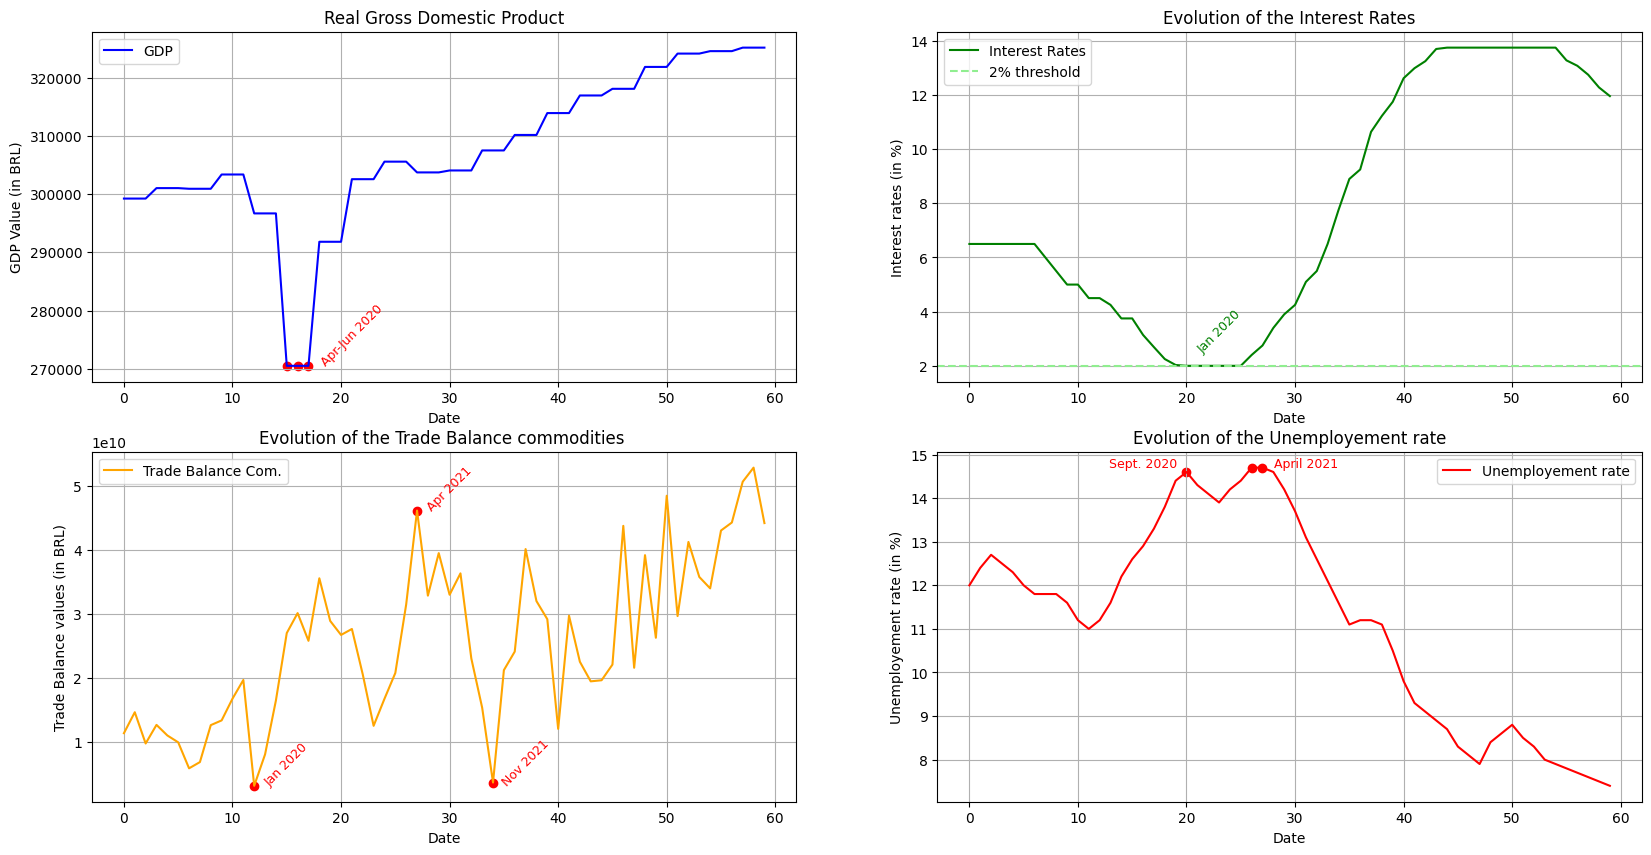

In [15]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)

#GDP Evolution plot
plt.plot(GDP_data_monthly["GDP (in BRL)"], label='GDP', color='blue')
min_points_values = GDP_data_monthly[GDP_data_monthly["GDP (in BRL)"] == GDP_data_monthly["GDP (in BRL)"].min()]["GDP (in BRL)"].tolist() #Give the minimum values
index_points = GDP_data_monthly[GDP_data_monthly["GDP (in BRL)"] == GDP_data_monthly["GDP (in BRL)"].min()]["GDP (in BRL)"].index.tolist() #Give the index matching with these minimum values
plt.scatter(index_points,min_points_values, color = "red") #Plot them with red points
plt.text(x=21, y=min(GDP_data_monthly["GDP (in BRL)"]), s='Apr-Jun 2020', fontsize=9, ha='center', color='red', rotation=45) #These red points match with April-May-June 2020
plt.title('Real Gross Domestic Product')
plt.xlabel('Date')
plt.ylabel('GDP Value (in BRL)')
plt.legend()
plt.grid(True)

#IR Evolution plot 
plt.subplot(2, 2, 2)
plt.plot(interest_rates_montly["Interest rate (in %)"], label = "Interest Rates", color = "green")
plt.axhline(y=2, color='#90EE90', linestyle='--', label='2% threshold')
plt.text(x=23, y=interest_rates_montly["Interest rate (in %)"].min()+0.5, s='Jan 2020', fontsize=9, ha='center', color='green', rotation=45)
plt.title("Evolution of the Interest Rates")
plt.xlabel('Date')
plt.ylabel('Interest rates (in %)')
plt.legend()
plt.grid(True)

#TB for commodities evolution plot
plt.subplot(2,2, 3)
plt.plot(trade_balance_monthly["Trade Balance Com. (in BRL)"], label = "Trade Balance Com.", color = "orange")
plt.scatter(trade_balance_monthly['Trade Balance Com. (in BRL)'].nsmallest(2).index,trade_balance_monthly['Trade Balance Com. (in BRL)'].nsmallest(2), color = "red") 
#Taking the  highest value of TB before index 30 : July 2021 
plt.scatter(trade_balance_monthly[trade_balance_monthly["Date"].index<30]["Trade Balance Com. (in BRL)"].nlargest(1).index,trade_balance_monthly[trade_balance_monthly["Date"].index<30]["Trade Balance Com. (in BRL)"].nlargest(1), color = "red")
plt.text(x=30, y=trade_balance_monthly[trade_balance_monthly["Date"].index<30]["Trade Balance Com. (in BRL)"].max(), s='Apr 2021', fontsize=9, ha='center', color='red', rotation=45)

plt.text(x=15, y=trade_balance_monthly['Trade Balance Com. (in BRL)'].min(), s='Jan 2020', fontsize=9, ha='center', color='red', rotation=45)
plt.text(x=37, y=trade_balance_monthly['Trade Balance Com. (in BRL)'].min(), s='Nov 2021', fontsize=9, ha='center', color='red', rotation=45)
plt.xlabel('Date')
plt.ylabel('Trade Balance values (in BRL)')
plt.legend()
plt.title("Evolution of the Trade Balance commodities ")
plt.grid(True)


#Unemployement Rate Evolution Plot
plt.subplot(2,2,4)
plt.plot(unemployement_rate_file_monthly["Unemployement rate (in%)"], label = "Unemployement rate", color = "red")
plt.scatter(unemployement_rate_file_monthly["Unemployement rate (in%)"].nlargest(3).index,unemployement_rate_file_monthly["Unemployement rate (in%)"].nlargest(3), color = "red") #Take the 3 highest values
plt.text(x=16, y=unemployement_rate_file_monthly["Unemployement rate (in%)"].max(), s='Sept. 2020', fontsize=9, ha='center', color='red')
plt.text(x=31, y=unemployement_rate_file_monthly["Unemployement rate (in%)"].max(), s='April 2021', fontsize=9, ha='center', color='red') #the dates matching with these points
plt.xlabel('Date')
plt.ylabel('Unemployement rate (in %)')
plt.legend()
plt.title("Evolution of the Unemployement rate")
plt.grid(True)


plt.show()


This figure shows the evolution of four key economic indicators for Brazil between 2019 and 2024.

**1. Real GDP (Real Gross Domestic Product)** :

- The chart shows a sharp drop in GDP around April 2020, followed by a rapid recovery. This decline coincides with the onset of the COVID-19 pandemic, which caused lockdowns and a sharp economic contraction around the world. The lowest point is marked as "Abr/Jun 2020" (April/June 2020).

- The recovery that follows is remarkably rapid, likely reflecting the economic stimulus measures implemented by the Brazilian government and the gradual reopening of the economy. After this recovery, we observe continued but more moderate growth until the end of the period.

(https://www.un.org/development/desa/dpad/publication/world-economic-situation-and-prospects-june-2020-briefing-no-138/)

**2. Interest Rate Evolution** :

- This chart shows a significant decline in interest rates to a low around January 2020, when they reached the 2% threshold. This decline likely reflects the efforts of the Brazilian central bank to stimulate the economy in the face of economic challenges (https://agenciabrasil.ebc.com.br/en/economia/noticia/2020-12/brazil-keeps-benchmark-interest-rate-2-year)

- Starting in 2021, there is a rapid and significant increase in interest rates, reaching a plateau around 14%. This increase is likely a response to rising inflation and aims to stabilize the economy in a post-pandemic recovery context. (https://www.brasildefato.com.br/2024/09/19/in-oposite-direction-to-the-us-brazil-raises-interest-rates)

**3. Commodity Trade Balance Evolution** :

- Here, there is a low point in January 2020, likely related to the initial disruptions to global trade due to the pandemic. A significant spike is observed in April 2021, which may reflect a recovery in Brazil's commodity exports, particularly to China, as the global economy began to recover. (https://economic-research.bnpparibas.com/html/en-US/Brazil-current-trade-patterns-China-threaten-promise-industrialization-4/5/2023,48437)

- Continued volatility suggests that Brazil's commodity trade remains sensitive to fluctuations in global demand and commodity prices.

**4. Evolution of the unemployment rate** :

The graph shows a sharp increase in unemployment peaking in September 2020, consistent with the impact of the pandemic on the labor market. A second peak is observed in April 2021, possibly related to a new wave of COVID-19 or ongoing economic restructuring.

After April 2021, there is a steady decline in the unemployment rate, reflecting the economic recovery and possibly the effectiveness of the government's employment policies.

Economic and political context:

<h3 style="text-align: center;">Major Events in Brazil during the period 2019-2024 </h3>

1. The COVID-19 pandemic had a significant impact on all indicators in 2020.
2. The government of Jair Bolsonaro (2019-2022) had to deal with the health and economic crisis, with sometimes controversial policies.
3. The election of Lula da Silva in late 2022 marked a change in political direction, which may explain some changes in the indicators in 2023-2024 (date 40+ on the graphs).
4. The Brazilian central bank's aggressive monetary policy, visible in the evolution of interest rates, aimed to contain inflation while supporting the economic recovery.

This analysis shows the sensitivity of Brazilian economy to global events and policy changes.

### A.1.5 Heatmap Correlation

In this section, we use a **correlation heatmap** to visualize and analyze the relationships between the FX returns and the other macroeconomic factors. The heatmap provides a clear visual representation of how these variables interact, allowing us to identify potential dependencies or patterns in the data.

In [16]:
#Preparing the big Dataframe
unemployement_rate_file_monthly['Date'] = unemployement_rate_file_monthly['Date'].dt.to_period('M')
trade_balance_monthly['Date'] = trade_balance_monthly['Date'].dt.to_period('M')
interest_rates_montly['Date'] = interest_rates_montly['Date'].dt.to_period('M')
GDP_data_monthly['Date'] = GDP_data_monthly['Date'].dt.to_period('M')
data_FX_returns_monthly['Date'] = data_FX_returns_monthly['Date'].dt.to_period('M')  #Standardize Date in a period type ta to gather all of them into a df 

all_data_monthly = pd.merge(data_FX_returns_monthly,interest_rates_montly, how = "left", on = "Date") 
all_data_monthly = pd.merge(all_data_monthly,unemployement_rate_file_monthly, how = "left", on = "Date")
all_data_monthly = pd.merge(all_data_monthly, GDP_data_monthly, how = "left", on = "Date")
all_data_monthly = pd.merge(all_data_monthly, trade_balance_monthly, how = "left", on = "Date") #Merging of all of features
all_data_monthly.head(10)

,Date,FX returns (in %),Interest rate (in %),Unemployement rate (in%),GDP (in BRL),Trade Balance Com. (in BRL)
0,2019-01,-0.998,6.5,12.0,299238.41,1.138326e+10
1,2019-02,-0.528,6.5,12.4,299238.41,1.466572e+10
2,2019-03,-2.269,6.5,12.7,299238.41,9.772881e+09
3,2019-04,0.384,6.5,12.5,301034.31,1.268394e+10
4,2019-05,0.166,6.5,12.3,301034.31,1.102988e+10
5,2019-06,-0.700,6.5,12.0,301034.31,9.954041e+09
6,2019-07,0.243,6.5,11.8,300920.41,5.887576e+09
7,2019-08,0.010,6.0,11.8,300920.41,6.863989e+09
8,2019-09,-0.290,5.5,11.8,300920.41,1.264393e+10
9,2019-10,-0.263,5.0,11.6,303372.69,1.338614e+10


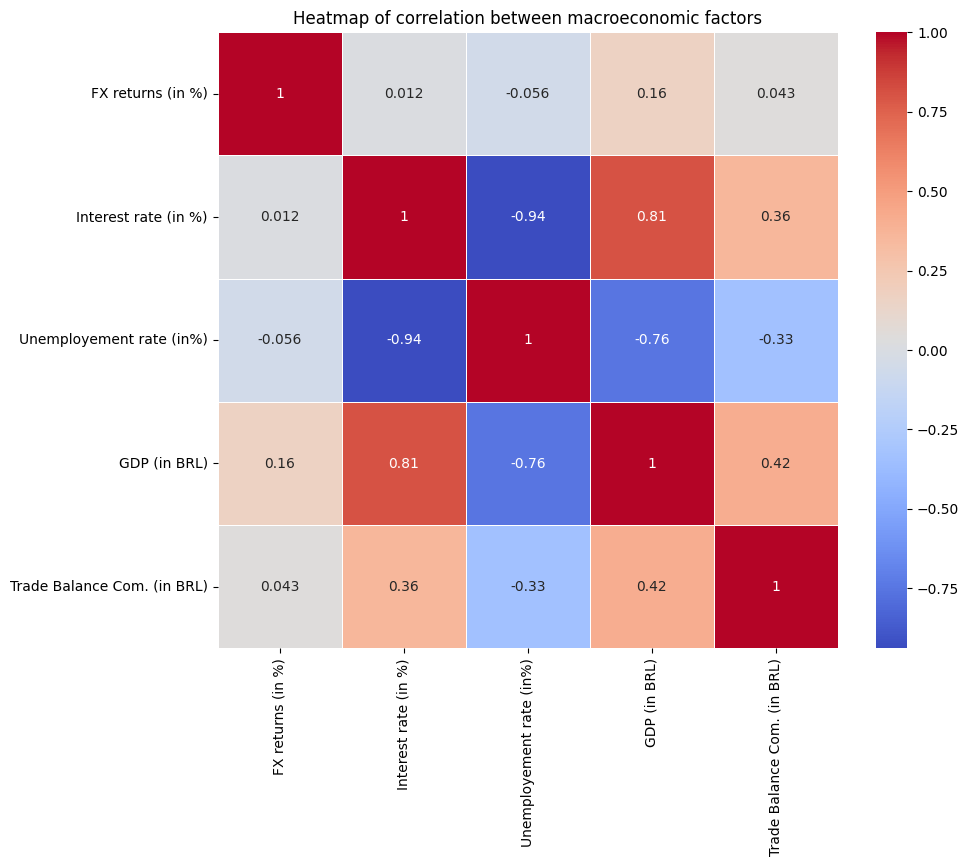

In [17]:
#Heatmap
all_data_monthly_without_date = all_data_monthly.drop(columns=['Date'])
correlation_matrix = all_data_monthly_without_date.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of correlation between macroeconomic factors')
plt.show()

This correlation heatmap shows the relationships between different macroeconomic factors in Brazil. Here is a detailed analysis :

**1. Exchange rate (FX returns)**:
- Shows little significant correlation with other variables
- The strongest correlation is with GDP (0.16), but remains weak

**2. Interest rate**:
- Strong negative correlation (-0.94) with unemployment rate
- High positive correlation (0.81) with GDP
- Moderate positive correlation (0.36) with trade balance

**3. Unemployment rate**:
- Strong negative correlation (-0.94) with interest rate
- Significant negative correlation (-0.76) with GDP
- Moderate negative correlation (-0.33) with trade balance

**4. GDP**:
- Strong positive correlation (0.81) with interest rate
- Significant negative correlation (-0.76) with unemployment rate
- Moderate positive correlation (0.42) with trade balance

**5. Trade balance**:
- Moderate positive correlations with GDP (0.42) and interest rate (0.36)
- Weak negative correlation (-0.33) with unemployment rate

<h3 style="text-align: center;"> Analysis </h3>

1. The strong negative correlation between interest rate and unemployment rate suggests that when interest rates rise, unemployment will decrease, and vice versa. This could reflect the central bank's efforts to balance economic inflation

2. The positive correlation between interest rate and GDP indicates that higher interest rates are associated with stronger economic growth. This could be explained by interest rates rising in response to a growing economy

3. GDP is negatively correlated with unemployment, which makes sense: a growing economy tends to create more jobs

4. FX returns appear largely independent of other factors, influenced by other factors than them ?

Idea of improvement : See correlations with the inflation or the Foreign direct investment (FDI) 

## A.2 Metrics

In [18]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %)
Date,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501
...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155


### A.2.1 Simple Moving Average (SMA)

The Simple Moving Average (SMA) is a technical indicator  to smooth out price fluctuations of a currency. It helps identify medium to long-term trends by eliminating minor variations or "noise" from the price data

we calculate this by:

$$
SMA_{t} = \frac{P_t +P_{t+1} + ... +P_{t-n+1}}{n}
$$

where :

- $MA_{t}$ is the simple moving average at the time t 
- $P_{t}$ is the price at the time t
- $n$ is the number of periods where SMA is calculated (50 or 200 days for example)


In [19]:
data['SMA_50'] = data['Adj Close'].rolling(window=50).mean()  #Shot term trends : 50 days
data['SMA_200'] = data['Adj Close'].rolling(window=200).mean() #long term trends : 200 days

In [20]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %),SMA_50,SMA_200
Date,,,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN,NaN,NaN
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003,NaN,NaN
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412,NaN,NaN
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824,NaN,NaN
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245,4.929287,4.941875
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002,4.925930,4.940045
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155,4.921452,4.937908


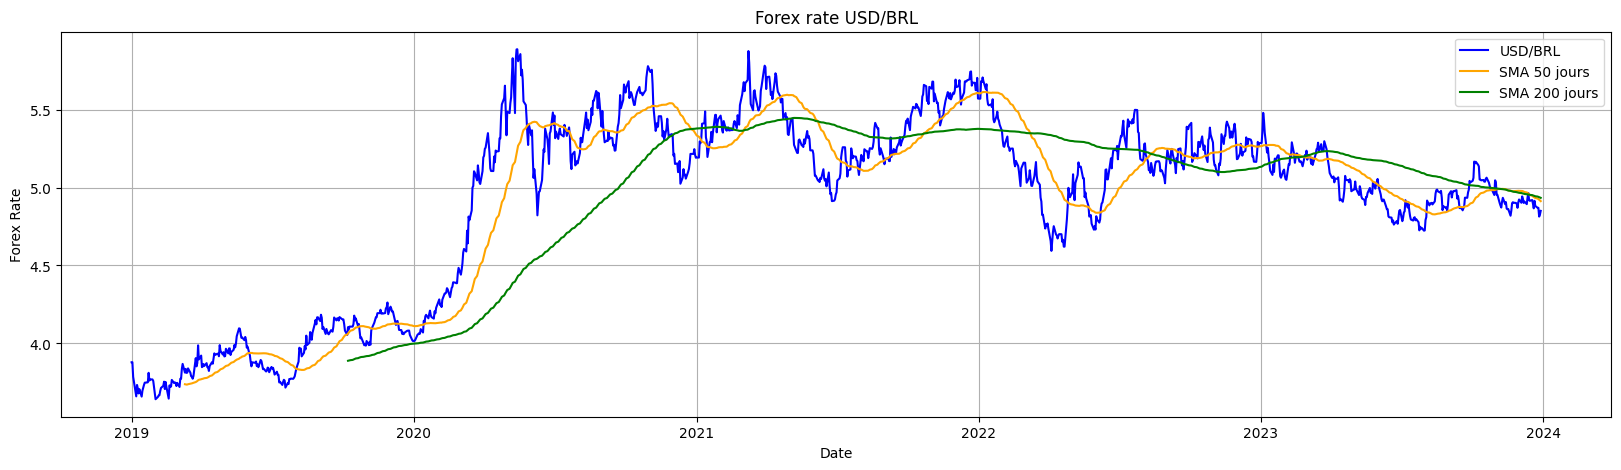

In [21]:
plt.figure(figsize=(20,5))
plt.plot(data['Adj Close'], label='USD/BRL', color='blue')
plt.plot(data['SMA_50'], label='SMA 50 jours', color='orange')
plt.plot(data['SMA_200'], label='SMA 200 jours', color='green')
plt.title('Forex rate USD/BRL')
plt.xlabel('Date')
plt.ylabel('Forex Rate')
plt.legend()
plt.grid()

### A.2.2 Average True Range (ATR) & Volatility

ATR is a technical indicator that measures the average volatility of an asset by taking into account gaps and price movements.

It can be expressed as : 

$$
\text{TR} = \max(\text{High−Low},\lvert \text{High−Previous Close} \rvert,\lvert \text{Low−Previous Close} \rvert)
$$
$$
\text{ATR} = \frac{\sum_{t=1}^{n}{TR_t}}{n}
$$


Volatility measures the magnitude and frequency of price fluctuations of an asset over a given period.

Often calculated as the standard deviation of returns, we can calculate volatility like this : 

$$
\text{Volatility} = \sqrt{\frac{\sum_{t=1}^{n}{(R_t-\mu)^2}}{n}}
$$

where $R_t$ is the return at the period t and $\mu$ the mean of these returns

In [22]:
data["Volatility (in %)"] = data["FX returns (in %)"].rolling(window = 30).std() * np.sqrt(252) #annualized volatility
data["Volatility (in %)"] = data["Volatility (in %)"].round(3) 

In [23]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %),SMA_50,SMA_200,Volatility (in %)
Date,,,,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN,NaN,NaN,NaN
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003,NaN,NaN,NaN
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412,NaN,NaN,NaN
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824,NaN,NaN,NaN
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245,4.929287,4.941875,9.046
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002,4.925930,4.940045,9.008
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155,4.921452,4.937908,9.291


In [24]:
#ATR function calculation
def calculate_atr(df : pd.DataFrame, n_periods : int) -> pd.DataFrame:

    tr_1 = df["High"] - df["Low"]
    tr_2 = abs(df["High"] - df["Close"].shift(1))  #Calculation of the three different true ranges
    tr_3 = abs(df["Low"] - df["Close"].shift(1))
    
    tr_final = pd.concat([tr_1, tr_2, tr_3], axis=1).max(axis=1)  #Calculation of the biggest gap between tr_1, tr_2, tr_3
    atr = tr_final.ewm(alpha=1/n_periods, adjust=False).mean()  #EMA of the true range where alpha is 1/n_periods

    return atr

data['ATR'] = calculate_atr(data,14) #On a period of 14 days


In [25]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %),SMA_50,SMA_200,Volatility (in %),ATR
Date,,,,,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN,NaN,NaN,NaN,0.000100
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003,NaN,NaN,NaN,0.006636
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412,NaN,NaN,NaN,0.016319
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824,NaN,NaN,NaN,0.020496
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501,NaN,NaN,NaN,0.023639
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245,4.929287,4.941875,9.046,0.055057
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002,4.925930,4.940045,9.008,0.055846
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155,4.921452,4.937908,9.291,0.056682


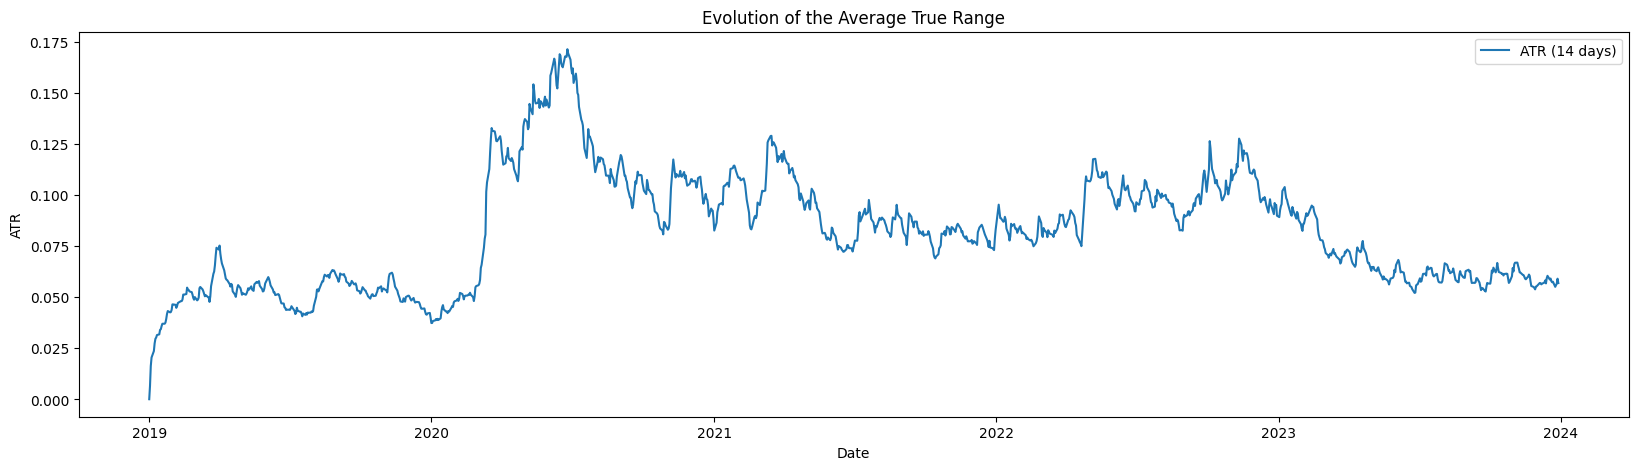

In [26]:
plt.figure(figsize=(20,5))
plt.plot(data["ATR"], label = "ATR (14 days)")
plt.xlabel("Date")
plt.ylabel("ATR")
plt.legend()
plt.title("Evolution of the Average True Range")
plt.show()

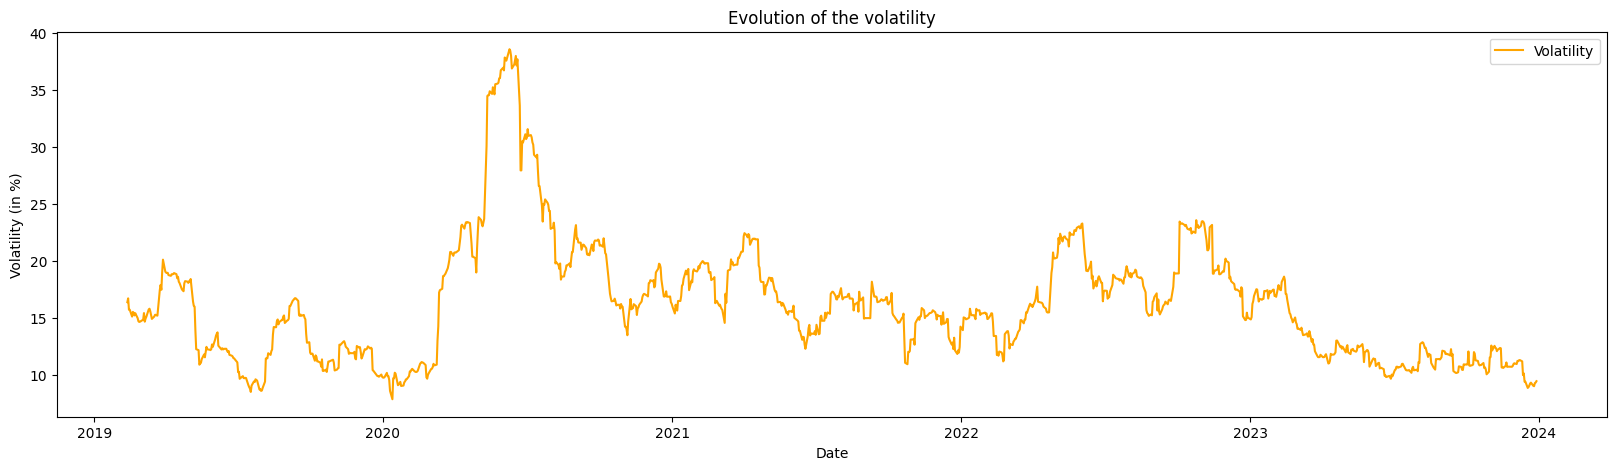

In [27]:
plt.figure(figsize=(20,5))
plt.plot(data["Volatility (in %)"], label = "Volatility", color = "orange")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Volatility (in %)")
plt.title("Evolution of the volatility")
plt.show()

Note : In general, when volatility increases, the ATR tends to increase as well (positive correlation)

### A.2.3 Relative Strengh Index

The Relative Strength Index (RSI) is a momentum oscillator used in technical analysis to assess the speed and direction of price movements, thereby indicating overbought or oversold conditions.

it can be calculated like this :

$$
\text{Average Gain} = \frac{\text{Gain}}{n}  \quad \text{Average Loss} = \frac{\text{Loss}}{n}
$$


$$
\text{RS} = \frac{\text{Average Gain}}{\text{Average Loss}} \quad  \text{RSI} = 100 - \left(\frac{100}{1+\text{RS}}\right)
$$

In [28]:
def calculate_rsi(df : pd.DataFrame, window : int ) -> float:
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data, 14)  #14 days
data["RSI_20"] = calculate_rsi(data, 20)  # 20 days
data["RSI_100"] = calculate_rsi(data, 100) #100 days


In [29]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %),SMA_50,SMA_200,Volatility (in %),ATR,RSI_14,RSI_20,RSI_100
Date,,,,,,,,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN,NaN,NaN,NaN,0.000100,NaN,NaN,NaN
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003,NaN,NaN,NaN,0.006636,NaN,NaN,NaN
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412,NaN,NaN,NaN,0.016319,NaN,NaN,NaN
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824,NaN,NaN,NaN,0.020496,NaN,NaN,NaN
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501,NaN,NaN,NaN,0.023639,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245,4.929287,4.941875,9.046,0.055057,39.220667,46.805470,49.675461
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002,4.925930,4.940045,9.008,0.055846,41.069883,47.321399,49.386172
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155,4.921452,4.937908,9.291,0.056682,37.621483,44.494668,48.255393


Basically, we condisere an overbought situation when RSI is higher than 70 and an oversold situation when RSI is less than 30

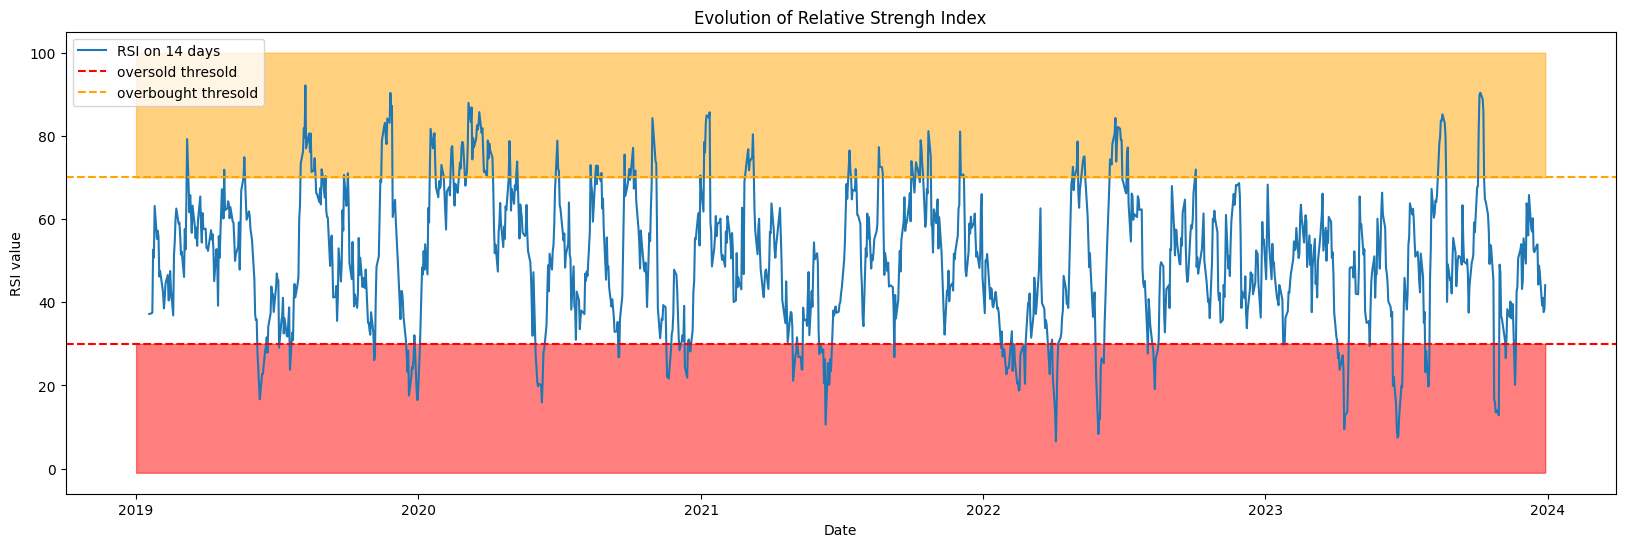

In [30]:
plt.figure(figsize=(20,6))
plt.plot(data["RSI_14"], label = "RSI on 14 days")
#plt.plot(data["RSI_20"], label = "RSI_20")
#plt.plot(data["RSI_100"], label = "RSI_100")

plt.axhline(y=30, color='r', linestyle='--', label='oversold thresold')  
plt.fill_between(data.index, -1, 30, color='red', alpha=0.5)

plt.axhline(y=70, color='orange', linestyle='--', label='overbought thresold')
plt.fill_between(data.index, 70, 100, color='orange', alpha=0.5)

plt.legend()
plt.xlabel("Date")
plt.ylabel("RSI value")
plt.title("Evolution of Relative Strengh Index")
plt.show()

### A.2.3 Sharp Ratio

The Sharpe ratio measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk.  It is defined as :

$$
\text{Sharp Ratio} = \frac{R_p - R_f}{\sigma} 
$$

Where : \
$R_p$ is the return of the portfolio (average rate) \
$R_f$ is the Risk-Free rate \
$\sigma$ is the standard deviation of $R_p$


In [31]:
def calculate_sharpe_ratio(returns:pd.DataFrame , risk_free_rate=0) -> float:
    mean_return = returns.mean()
    std_dev = returns.std()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev if std_dev != 0 else np.nan
    return sharpe_ratio

sharpe_ratio = calculate_sharpe_ratio(data["FX returns (in %)"])


print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.02


The Sharpe ratio is 0.02, which falls between 0 and 1, indicating that the risk associated with the investment is too high relative to the returns achieved.

### Gathered metrics

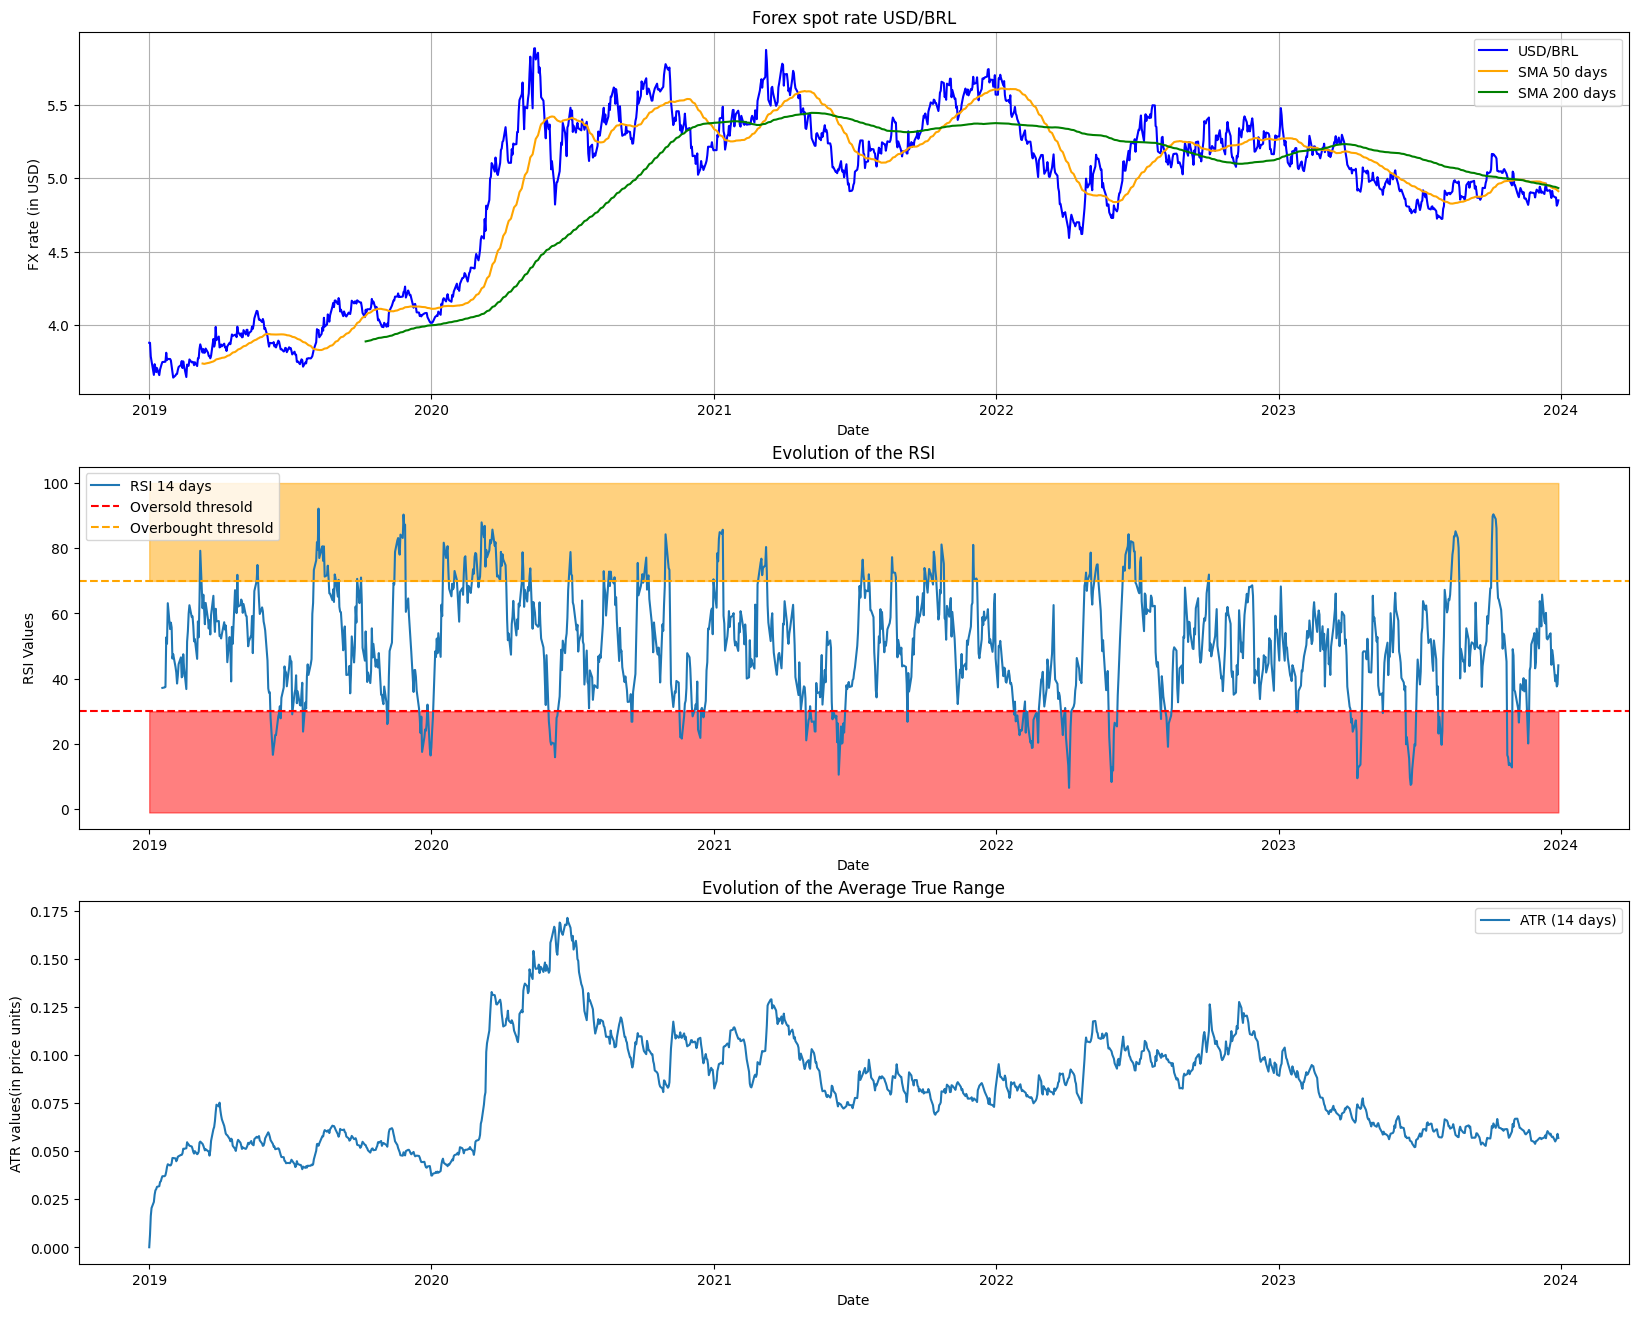

In [32]:
plt.figure(figsize=(20, 16))

plt.subplot(3, 1, 1)
plt.plot(data['Adj Close'], label='USD/BRL', color='blue')
plt.plot(data['SMA_50'], label='SMA 50 days', color='orange')
plt.plot(data['SMA_200'], label='SMA 200 days', color='green')
plt.title('Forex spot rate USD/BRL')
plt.xlabel('Date')
plt.ylabel('FX rate (in USD)')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(data["RSI_14"], label = "RSI 14 days")
plt.axhline(y=30, color='r', linestyle='--', label='Oversold thresold')
plt.fill_between(data.index, -1, 30, color='red', alpha=0.5)
plt.axhline(y=70, color='orange', linestyle='--', label='Overbought thresold')
plt.fill_between(data.index, 70, 100, color='orange', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('RSI Values')
plt.legend()
plt.title("Evolution of the RSI")


plt.subplot(3,1,3)
plt.plot(data["ATR"], label = "ATR (14 days)")
#plt.plot(data["Volatility"],label = "Volatility")
plt.xlabel('Date')
plt.ylabel('ATR values(in price units)')
plt.legend()
plt.title("Evolution of the Average True Range")


plt.show()




- The highly increased volatility in 2020 clearly reflects the impact of the COVID-19 crisis on the Brazilian economy and investor confidence.

- The downward trend in the USD/BRL rate in 2023-2024 suggests a strengthening of the real, possibly linked to an improvement in Brazil’s economic outlook or changes in monetary policy.

- The continued decline in the ATR in 2023-2024 indicates a stabilization of the FX market, which could reflect greater investor confidence in the Brazilian economy.

# B. Trading Stategies

## B.1 The Gold and Death Cross

The **Golden Cross** occurs when a short-term moving average crosses above a long-term moving average, signaling a buy opportunity, while the Death Cross happens when it crosses below, indicating a sell signal.

In [33]:
data

,Open,High,Low,Close,Adj Close,Volume,FX returns (in %),SMA_50,SMA_200,Volatility (in %),ATR,RSI_14,RSI_20,RSI_100
Date,,,,,,,,,,,,,,
2019-01-01,3.880000,3.880000,3.879900,3.880000,3.880000,0,NaN,NaN,NaN,NaN,0.000100,NaN,NaN,NaN
2019-01-02,3.879900,3.895900,3.804300,3.879900,3.879900,0,-0.003,NaN,NaN,NaN,0.006636,NaN,NaN,NaN
2019-01-03,3.786600,3.804700,3.737700,3.786300,3.786300,0,-2.412,NaN,NaN,NaN,0.016319,NaN,NaN,NaN
2019-01-04,3.755000,3.783600,3.711500,3.755100,3.755100,0,-0.824,NaN,NaN,NaN,0.020496,NaN,NaN,NaN
2019-01-07,3.713700,3.722900,3.690600,3.661200,3.661200,0,-2.501,NaN,NaN,NaN,0.023639,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,4.869844,4.874801,4.859500,4.869844,4.869844,0,-0.245,4.929287,4.941875,9.046,0.055057,39.220667,46.805470,49.675461
2023-12-26,4.869744,4.890900,4.824800,4.869744,4.869744,0,-0.002,4.925930,4.940045,9.008,0.055846,41.069883,47.321399,49.386172
2023-12-27,4.813500,4.834400,4.802200,4.813500,4.813500,0,-1.155,4.921452,4.937908,9.291,0.056682,37.621483,44.494668,48.255393


/var/folders/3g/qyym0p2j7pzb4_3m4sf7lnr40000gn/T/ipykernel_40901/885784241.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal_GDC'][data['SMA_50'] > data['SMA_200']] = 1  # Buy if SMA 50 days is higher then SMA 200 days (short 

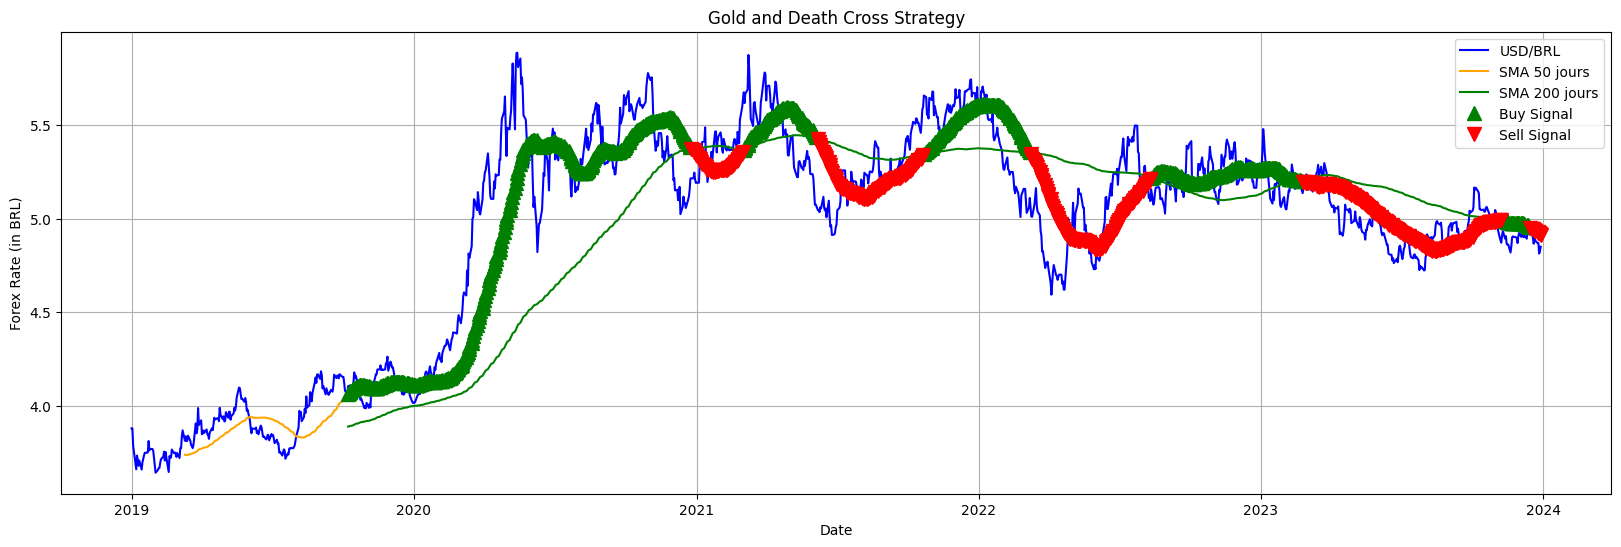

In [34]:
data['Signal_GDC'] = 0
data['Signal_GDC'][data['SMA_50'] > data['SMA_200']] = 1  # Buy if SMA 50 days is higher then SMA 200 days (short term > long term)
data['Signal_GDC'][data['SMA_50'] < data['SMA_200']] = -1  # Sell if SMA 50 days is less then SMA 200 days (long term > short term)
data['Position_GDC'] = data['Signal_GDC'].shift(1) #Because we take the position on the month before

plt.figure(figsize=(20,6))
plt.plot(data['Adj Close'], label='USD/BRL', color='blue')
plt.plot(data['SMA_50'], label='SMA 50 jours', color='orange')
plt.plot(data['SMA_200'], label='SMA 200 jours', color='green')

plt.plot(data[data['Signal_GDC'] == 1].index, data['SMA_50'][data['Signal_GDC'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Signal_GDC'] == -1].index, data['SMA_50'][data['Signal_GDC'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Gold and Death Cross Strategy')
plt.xlabel('Date')
plt.ylabel('Forex Rate (in BRL)')
plt.legend()
plt.grid()

## B.2 RSI Strategy

The **Relative Strengh Index** measures the speed and change of price movements on a scale of 0 to 100, indicating overbought conditions above 70 and oversold conditions below 30.

/var/folders/3g/qyym0p2j7pzb4_3m4sf7lnr40000gn/T/ipykernel_40901/243061898.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal_RSI'][data['RSI_14'] < 30] = 1  # Buy signal if RSI < 30
/var/folders/3g/qyym0p2j7pzb4_3m4sf7lnr40000

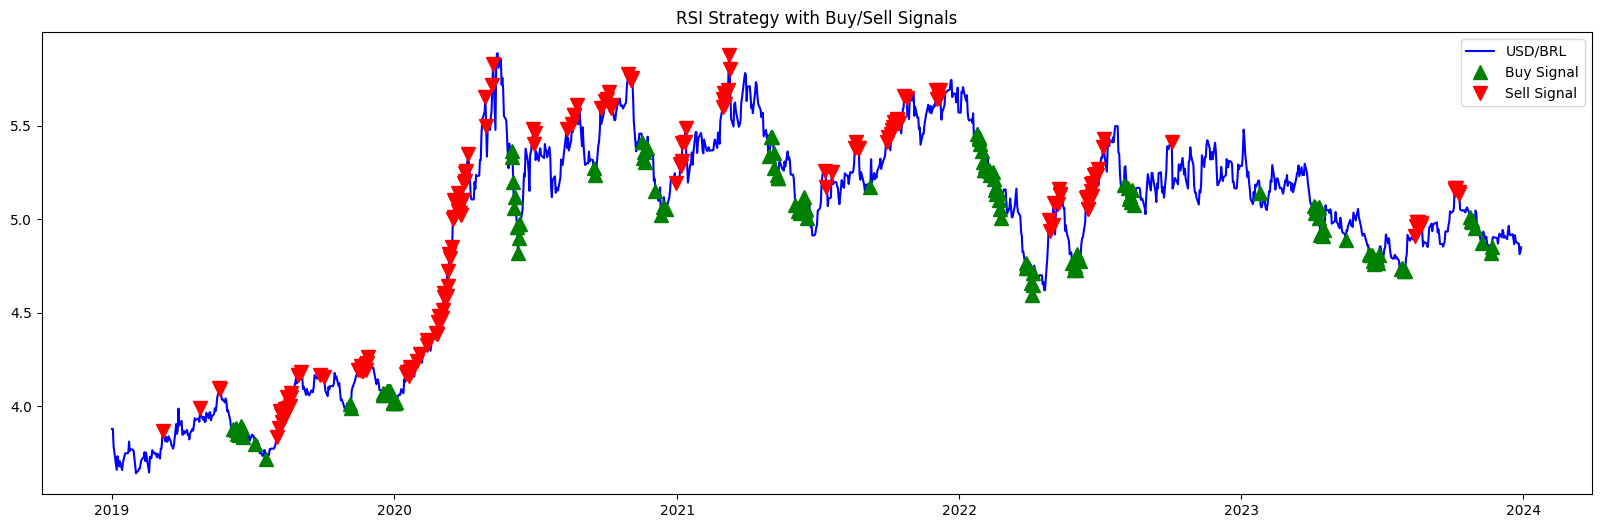

In [35]:
data['Signal_RSI'] = 0
data['Signal_RSI'][data['RSI_14'] < 30] = 1  # Buy signal if RSI < 30
data['Signal_RSI'][data['RSI_14'] > 70] = -1 # Sell signal if RSI > 70

data['Position_RSI'] = data['Signal_RSI'].shift(1) #Because we take the position on the month before

plt.figure(figsize=(20,6))
plt.plot(data['Adj Close'], label='USD/BRL', color='blue')
plt.plot(data[data['Signal_RSI'] == 1].index, data['Adj Close'][data['Signal_RSI'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Signal_RSI'] == -1].index, data['Adj Close'][data['Signal_RSI'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('RSI Strategy with Buy/Sell Signals')
plt.legend()
plt.show()

## B.3 Comparison of both strategies

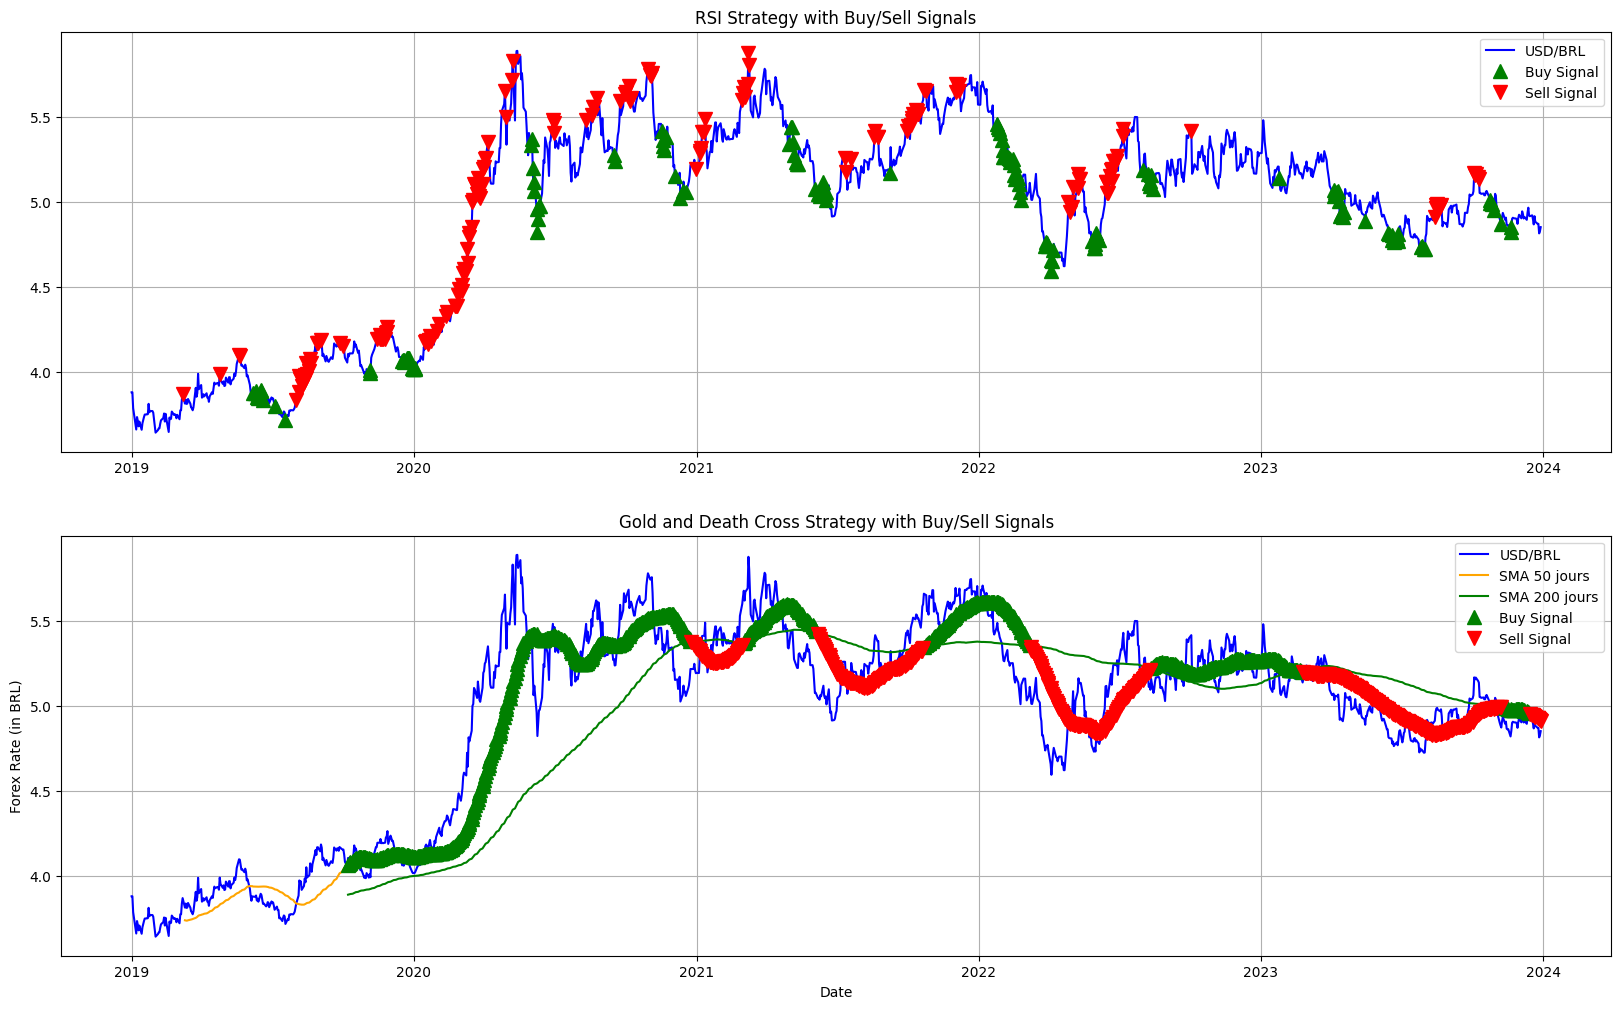

In [36]:
#Gathering the two strategies on a same subplot
plt.figure(figsize=(20,12))

plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='USD/BRL', color='blue')
plt.plot(data[data['Signal_RSI'] == 1].index, data['Adj Close'][data['Signal_RSI'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Signal_RSI'] == -1].index, data['Adj Close'][data['Signal_RSI'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('RSI Strategy with Buy/Sell Signals')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(data['Adj Close'], label='USD/BRL', color='blue')
plt.plot(data['SMA_50'], label='SMA 50 jours', color='orange')
plt.plot(data['SMA_200'], label='SMA 200 jours', color='green')

plt.plot(data[data['Signal_GDC'] == 1].index, data['SMA_50'][data['Signal_GDC'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Signal_GDC'] == -1].index, data['SMA_50'][data['Signal_GDC'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Gold and Death Cross Strategy with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Forex Rate (in BRL)')
plt.legend()
plt.grid()

plt.show()

**Comparative Analysis** :

- The RSI strategy generates significantly more signals, which can be beneficial for short-term traders
- The Golden and Death Cross strategy generates fewer signals, which is better suited for longer-term positions


- The RSI strategy reacts more quickly to price changes, potentially allowing it to capture more moves
- The Cross strategy is slower to react, but can avoid some false signals due to short-term volatility

- The Cross strategy seems to be better at identifying longer-term trends, such as the consolidation period in 2021-2022


In [37]:
data['Strategy GDC Returns'] = (data['FX returns (in %)']/100 )* data['Signal_GDC'].shift()
data['Strategy RSI Returns'] = (data['FX returns (in %)']/100 ) * data['Signal_RSI'].shift()

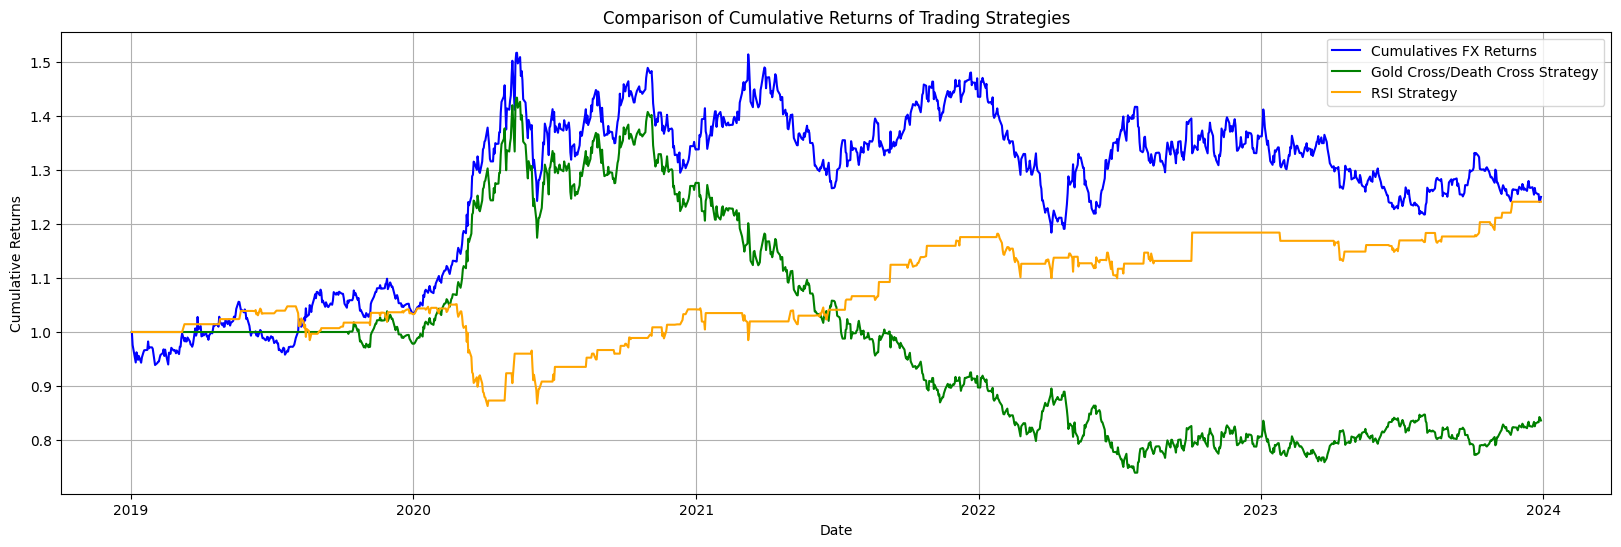

In [38]:
data['Cumulative FX Returns'] = (1 + (data['FX returns (in %)'])/100).cumprod()
data['Cumulative Strategy GDC Returns'] = (1 + data['Strategy GDC Returns']).cumprod() #track the overall performance of the GDC strategy over time, starting from an initial investment of 1
data['Cumulative Strategy RSI Returns'] = (1 + data['Strategy RSI Returns']).cumprod() #same with RSI strategy 

plt.figure(figsize=(20, 6))
plt.plot(data['Cumulative FX Returns'], label='Cumulatives FX Returns', color='blue')
plt.plot(data['Cumulative Strategy GDC Returns'], label='Gold Cross/Death Cross Strategy', color='green')
plt.plot(data['Cumulative Strategy RSI Returns'], label='RSI Strategy', color='orange')
plt.title('Comparison of Cumulative Returns of Trading Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

Here is a detailed analysis:

- Gold Cross/Death Cross Strategy is very strong y in 2020, following the market trend well but steady decline from mid-2021, significantly underperforming other strategies. It finishes with the weakest returns among the three strategies.

- RSI Strategy is most stable and consistent performance. It is steady and consistent recovery from mid-2020 and finishes with solid returns, outperforming the Gold/Death Cross strategy

- The RSI strategy offered the best compromise between return and stability, with consistent growth and limited volatility

- The Gold/Death Cross strategy performed well during the strong trend in 2020 but then significantly underperformed, suggesting that it may be less suited to more stable markets or long-term trend changes

In [39]:
!pip freeze > requirements.txt

In [44]:
import sys

python_version = sys.version

with open('requirements.txt', 'a') as f:
    f.write(f"\nPython Version: {python_version}\n")